In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
path="hello - pluviometrie.csv"
data=pd.read_csv(path)
data.head()

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
0,2021-07-31,جندوبة,0.0,0.0,5.198000,367.8,449.019077,0.6,412.2
1,2021-07-31,بوسالم,0.0,0.0,3.317778,338.3,422.749899,0.0,363.9
2,2021-07-31,غار الدماء,0.0,3.0,4.118841,375.1,438.382102,0.0,412.5
3,2021-07-31,عين دراهم,0.0,0.0,7.126000,1234.0,1558.325693,7.0,1183.0
4,2021-07-31,طبرقة,0.0,0.0,3.944000,922.5,939.731385,0.6,849.8


In [5]:
data.shape # shape before Cleaning

(102607, 9)

In [6]:
data = data.drop_duplicates() # pour supprimer les lignes dupliquées

In [7]:
data.shape #shape after cleaning

(85140, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85140 entries, 0 to 102606
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      85140 non-null  object 
 1   station                   85140 non-null  object 
 2   Pluvio_du_jour            85140 non-null  float64
 3   Cumul_du_mois             85140 non-null  float64
 4   Cumul_moy_du_mois         85140 non-null  float64
 5   Cumul_periode             85140 non-null  float64
 6   Cumul_moy_periode         85140 non-null  float64
 7   Cumul_mois_precedent      85140 non-null  float64
 8   Cumul_periode_precedente  85140 non-null  float64
dtypes: float64(7), object(2)
memory usage: 6.5+ MB


In [9]:
data.isnull().sum() #pour calculer le nombre de NaN dans chaque colone

Date                        0
station                     0
Pluvio_du_jour              0
Cumul_du_mois               0
Cumul_moy_du_mois           0
Cumul_periode               0
Cumul_moy_periode           0
Cumul_mois_precedent        0
Cumul_periode_precedente    0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [11]:
data['station'].nunique() #calculer le nombre de stations


127

On a 127 stations comme le montre la derniére ligne du dernier output.


///////////////////////////////////////////////////////////////////////////////////////


In [12]:
from sklearn.preprocessing import LabelEncoder
staation = LabelEncoder()
data['station'] = staation.fit_transform(data['station'])
data["station"].unique()

array([ 65,  46, 101, 100,  97,  80,  40, 116, 125,  81,  52,  58,  25,
        83,  74, 113,  22,  12,  50,  86,  47,  26,  10,  85,  78, 120,
        57,  56,   0,  91, 112, 123,  39,   2,  41,  38,   7, 124, 114,
       107, 121, 109,  36,   5,  73,  19,  79,  96,   3,  44,  59,  71,
        16, 115,  66,  77,  24,  67,  84,  37,  11,  93,  82,  21, 103,
       104,  68,  75,  76,  51,  89,  92,  48,  30,   9,  64,  28,  87,
        35, 118,  90,  27,  32,  31,  98,  63,  34,  15,  14,  18,  95,
        99,  49,  17, 108, 122,   6, 111,  23,  13,  33,   8,  94,   1,
        55,  54,  69, 126, 106,  20,  70, 105,   4,  29, 119, 117,  45,
        42,  62,  61,  53, 102,  72, 110,  88,  43,  60])

**on a 127 stations qu'on numérote de 0 vers 126**


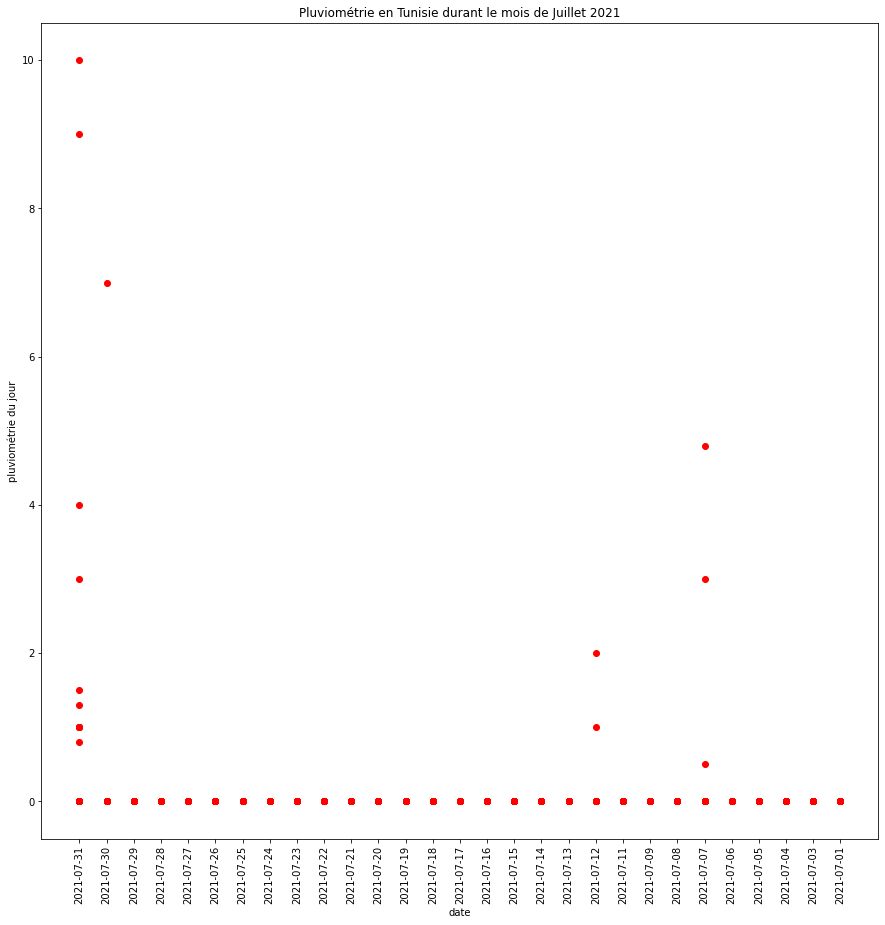

In [13]:
fig = plt.figure(figsize = (15,15))
plt.scatter(data["Date"][1:3567],data["Pluvio_du_jour"][1:3567],color="red")
plt.title('Pluviométrie en Tunisie durant le mois de Juillet 2021')
plt.xlabel("date")
plt.xticks(rotation=90)
plt.ylabel("pluviométrie du jour")
plt.show()

Généralement pas de pluie en mois de Juillet à l'exception de quelques jours et ceci avec des quantités faibles.
NB: chaque point dans le graphe représente une station, un seul point en 0 veut dire qu'il n'y avait pas de pluie dans toutes les stations.

In [14]:
dataTypeSeries = data.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
Date                         object
station                       int32
Pluvio_du_jour              float64
Cumul_du_mois               float64
Cumul_moy_du_mois           float64
Cumul_periode               float64
Cumul_moy_periode           float64
Cumul_mois_precedent        float64
Cumul_periode_precedente    float64
dtype: object


il faut transformer la variable Date à une valeur numérique. Pour cela on définit la fonction ci-dessous

In [15]:
def transform(d):
    l=d.split("-",maxsplit=2)
    int_list = list(map(int, l))

    return  int_list[0]*10000+int_list[1]*100+int_list[2]

In [16]:
data['Date'] = data['Date'].apply(transform)

L'input ci-dessus applique la fonction transform sur la colone date pour transformer les dates en des entiers et l'input ci-dessous vérifie que se s'est passée correctement


In [17]:
data.head()

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
0,20210731,65,0.0,0.0,5.198000,367.8,449.019077,0.6,412.2
1,20210731,46,0.0,0.0,3.317778,338.3,422.749899,0.0,363.9
2,20210731,101,0.0,3.0,4.118841,375.1,438.382102,0.0,412.5
3,20210731,100,0.0,0.0,7.126000,1234.0,1558.325693,7.0,1183.0
4,20210731,97,0.0,0.0,3.944000,922.5,939.731385,0.6,849.8


In [18]:
data.tail()

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
102602,20190901,62,0.0,0.0,0.479592,0.0,0.479592,0.0,0.0
102603,20190901,60,0.0,0.0,1.081633,0.0,1.081633,0.0,0.0
102604,20190901,53,0.0,0.0,0.377778,0.0,0.377778,0.0,0.0
102605,20190901,102,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
102606,20190901,72,2.5,2.5,0.002326,2.5,0.002326,1.0,1.0


In [19]:
X = data.drop(["Cumul_du_mois","Pluvio_du_jour"] ,axis=1) #features
y = data["Cumul_du_mois"] #label ( on veut prédire la pluviométrie d'un mois)

on choisit de prédire la pluviométrie du mois


In [20]:
###########

In [21]:
X

,Date,station,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
0,20210731,65,5.198000,367.8,449.019077,0.6,412.2
1,20210731,46,3.317778,338.3,422.749899,0.0,363.9
2,20210731,101,4.118841,375.1,438.382102,0.0,412.5
3,20210731,100,7.126000,1234.0,1558.325693,7.0,1183.0
4,20210731,97,3.944000,922.5,939.731385,0.6,849.8
...,...,...,...,...,...,...,...
102602,20190901,62,0.479592,0.0,0.479592,0.0,0.0
102603,20190901,60,1.081633,0.0,1.081633,0.0,0.0
102604,20190901,53,0.377778,0.0,0.377778,0.0,0.0
102605,20190901,102,0.000000,0.0,0.000000,0.0,0.0


In [22]:
y

0         0.0
1         0.0
2         3.0
3         0.0
4         0.0
         ... 
102602    0.0
102603    0.0
102604    0.0
102605    0.0
102606    2.5
Name: Cumul_du_mois, Length: 85140, dtype: float64

* **** Régression linéaire *****

In [23]:
from sklearn.linear_model import LinearRegression # regression linéaire
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y.values, random_state = 0)
#la ligne ci-dessus divise les données en données pour entrainement et pour test
linear_reg = LinearRegression()
linear_reg.fit(train_X, train_y)

LinearRegression()

In [24]:
y_pred = linear_reg.predict(val_X)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(val_y, y_pred))

In [26]:
error

23.909627257593574

On trouve une erreur de 23.9 mm par mois pour la regression linéaire. On essaie alors d'autres algorithmes.


**decision tree regressor ( ARBRE de décision)****


In [27]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred = dec_tree_reg.predict(val_X)

In [29]:
error = np.sqrt(mean_squared_error(val_y, y_pred))
error 

4.690484322108486

On trouve une erreur de seulement 3.94 pour la pluviométrie d'un mois ( l'algorithme de l'arbre de décision est beaucoup plus meilleur)


In [30]:
from sklearn import tree
#tree.plot_tree(dec_tree_reg) 

**Random forrest regression ( foret aléatoire)****

In [31]:
from sklearn.ensemble import RandomForestRegressor 
# on essaye maintenant l'algorithme de RandomForrest
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(train_X, train_y)

RandomForestRegressor(random_state=0)

In [32]:
y_pred = random_forest_reg.predict(val_X)

In [33]:
error = np.sqrt(mean_squared_error(val_y, y_pred))
error 

2.7652075305073804

une erreur encore moins importante de seulement 2.78 mm par mois avec l'algorithme foret aléatoire


**Un petit test**


In [34]:
X=np.array([[20210731,65,5.19799998268485,371.2,461.8670773212495,0.0,411.59999999999997 ]])

# 65 désigne la station jendouba (جندوبة)
# mois de juillet

In [35]:
BestRegressor=random_forest_reg # on a obtenu le meilleur résultat avec le random forrest regressor

In [36]:
y_pred = BestRegressor.predict(X)
y_pred

array([0.445])

bon résultat : il n'y avait pas de pluie à la station Jendouba en mois de Juillet et cet algorithme de foret aléatoire a juste prédit une pluviométrie de 0.42. +++++++++++
Le vrai résultat est donné ci-dessous

In [37]:
data.head(1)

,Date,station,Pluvio_du_jour,Cumul_du_mois,Cumul_moy_du_mois,Cumul_periode,Cumul_moy_periode,Cumul_mois_precedent,Cumul_periode_precedente
0,20210731,65,0.0,0.0,5.198,367.8,449.019077,0.6,412.2


**********************************************************************************************************
***************************Enregistrement du modéle *********************************

In [38]:
import pickle

In [39]:
dataa = {"model": BestRegressor, "staation": staation}
with open('saved_steps.pkl', 'wb') as file:  # wb : write in binary
    pickle.dump(dataa, file)

In [40]:
with open('saved_steps.pkl', 'rb') as file:
    dataa = pickle.load(file)

regressor_loaded = dataa["model"]
staation = dataa["staation"]


In [41]:
y_pred = regressor_loaded.predict(X)
y_pred 

array([0.445])

on trouve le meme résultat donc le modéle a été enregistré avec succés


In [42]:
###############

On teste le modéle sur un autre exemple ( moi de **juillet** station (**101**) **Ghardimaou** ou il y avait juste **3 mm** de puie)


In [43]:
X1=np.array([[20210731,101,3.3177777916193008,338.3,419.5121215622385,0.0,363.9 ]])
y_pred = regressor_loaded.predict(X1)
y_pred 

array([1.04])

*** une erreur de 1.9 mm. *** 


In [44]:
###########################################

**Le modéle prédit-il les innondations ?**

En septembre 2020, les stations de Sousse(87), Monastir(32), Mahdia(34) ont eu respectivement comme un cumul de pluie à la fin du mois des valeurs de 194 , 215 et 225.5 mm.

D'aprés http://www.mementodumaire.net/guide-PCS-inondation/PDF/Partie2.pdf un cumul de 50 mm par jour peut se considérer comme inondation dans une zone non montagneuse

In [45]:
# cas station monastir 
X1=np.array([[20200930,32,45.75,411.0,338.12577463482364,31,31 ]])
y_pred = regressor_loaded.predict(X1)
y_pred 

array([263.031])

oui, le modéle modéle prédit un cumul de mois de 261 mm ( la valeur réelle est de 215 mm) . le modéle prédit donc l'innondation de la station de Monastir


In [46]:
# cas station mahdia 
X2=np.array([[20200930,34,41.97,316.5,342.982,14.3,14.3 ]])
y_pred = regressor_loaded.predict(X2)
y_pred 

array([203.371])

le modéle prédit un cumul de mois de 224 mm ( la valeur réelle est de 225.5 mm) . le modéle prédit donc l'innondation de la station de mahdia


In [47]:
# cas station sousse
X3=np.array([[20200930,87,40.04489793582839,356.3,353.9066720711686,40,40 ]])
y_pred = regressor_loaded.predict(X3)
y_pred 

array([140.34])

une prédiction de 140.5 mm par mois ( la valeur réelle est de 194 mm ) on peut considérer que le modéle prédit une faible inondation càd des quantités importantes mais un peu moins importantes que celles des stations Monastir et mahdia

In [48]:
#############

**Prédiction pour le mois de Aout ( voir le tableau Excel)**** **( en utilisant le modéle )**

In [49]:
# cumul de mois prédit par le modéle pour la station Nabeul mois Aout
X=np.array([[20210831,124,10.784,316.7,396.5,0,396.8]])
y_pred = regressor_loaded.predict(X)
y_pred 

array([4.27])

In [50]:
####################################################